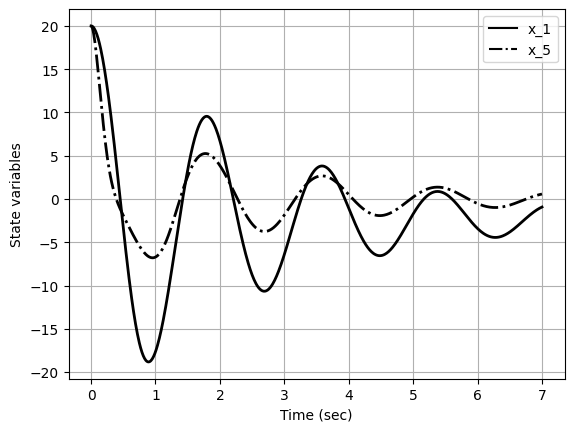

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import StateSpace, lsim

# تعریف سیستم حالت-فضا
A = np.array([
    [0,    0,   0,   0,   0,    1,      0,      0,   0,   0],
    [0,    0,   0,   0,   0,    1,     -1,      0,   0,   0],
    [0,    0,   0,   0,   0,    0,      1,     -1,   0,   0],
    [0,    0,   0,   0,   0,    0,      0,      1,  -1,   0],
    [0,    0,   0,   0,   0,    0,      0,      0,   1,  -1],
    [0, -12.5,  0,   0,   0,  -0.75,   0.75,    0,   0,   0],
    [0,  62.5,-62.5, 0,   0,   3.75,  -7.5,   3.75,  0,   0],
    [0,    0, 62.5,-62.5, 0,    0,   3.75,  -7.5,  3.75,  0], 
    [0,    0,   0, 62.5,-62.5,  0,     0,   3.75,  -7.5, 3.75],
    [0,    0,   0,   0,  62.5,  0,     0,     0,   3.75,-3.75]
])

b1 = np.array([[0], [0], [0], [0], [0.005], [0], [0], [0], [0], [0]])  # نیروی ورودی به شکل ستونی
C = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
D = np.array([[0]])

# مدل قطار با استفاده از ورودی اول
train_model = StateSpace(A, b1, C, D)

# پارامترهای شبیه‌سازی
t = np.arange(0, 7.01, 0.01)
x0 = np.array([20, 20, 20, 20, 20, 0, 0, 0, 0, 0])

# تولید ورودی u
u = 0.1 * (np.sin(5*t) + np.sin(9*t) + np.sin(13*t) + np.sin(17*t) + np.sin(21*t))

# شبیه‌سازی سیستم با ورودی u و مدل حالت-فضا
t, y, x = lsim(train_model, U=u, T=t, X0=x0)

# رسم نمودار
plt.figure()
plt.plot(t, x[:, 0], 'k', label='x_1')
plt.plot(t, x[:, 4], 'k-.', label='x_5')
plt.grid()
plt.xlabel('Time (sec)')
plt.ylabel('State variables')
plt.legend()
plt.gca().lines[0].set_linewidth(2)
plt.gca().lines[1].set_linewidth(2)
plt.show()
